

# Project: Investigate a Dataset (TMDb Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The TMDb Movie dataset has been selected for analysis. The dataset is a collection of information on around 10000 movies. For each movie, the dataset includes information  their details of budget, revenue, release dates, etc.



 What are the top 10 cost budget movies ?
 
 
 What run times are associated with each genre?
 
 
 How have movie production trends varied over the years?

In [3]:
#import statements for packages to be used
import pandas as pd
import numpy as np
import csv # read and write csv files
from datetime import datetime
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

The dataset has information about :

    Rows: 10866
    Columns: 21
    
Null values present in variables : imdb_id , cast ,homepage,director,tagline ,
keywords ,overview  , genres  and production_companies .

We found one duplicate row while assessing the data. That row will now be removed from the dataframe .

In [4]:
#reading tmdb csv file and storing that to a variable
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
df.shape

(10866, 21)

In [9]:
sum(df.duplicated())

1



### Data Cleaning 

 - Remove duplicate rows
- Remove unnecessory columns such as   id ,  imdb_id ,  popularity ,  budget_adj ,  revenue_adj ,  homepage , keywords ,  overview , production_companies , vote_count  and  vote_average .





In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
id                      10865 non-null int64
imdb_id                 10855 non-null object
popularity              10865 non-null float64
budget                  10865 non-null int64
revenue                 10865 non-null int64
original_title          10865 non-null object
cast                    10789 non-null object
homepage                2936 non-null object
director                10821 non-null object
tagline                 8041 non-null object
keywords                9372 non-null object
overview                10861 non-null object
runtime                 10865 non-null int64
genres                  10842 non-null object
production_companies    9835 non-null object
release_date            10865 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null int64
budget_adj              1

In [10]:
sum(df.duplicated())

0

In [8]:
del_col = [ 'id', 'imdb_id', 'popularity', 'budget_adj', 'revenue_adj', 'homepage', 'keywords', 'overview', 'production_companies', 'vote_count', 'vote_average']

 

df = df.drop(del_col, 1)

df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,release_date,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,3/18/15,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,4/1/15,2015


# <a id='eda'></a>
## Exploratory Data Analysis


## Research Question 1 : What are the top 10 cost budget movies ?

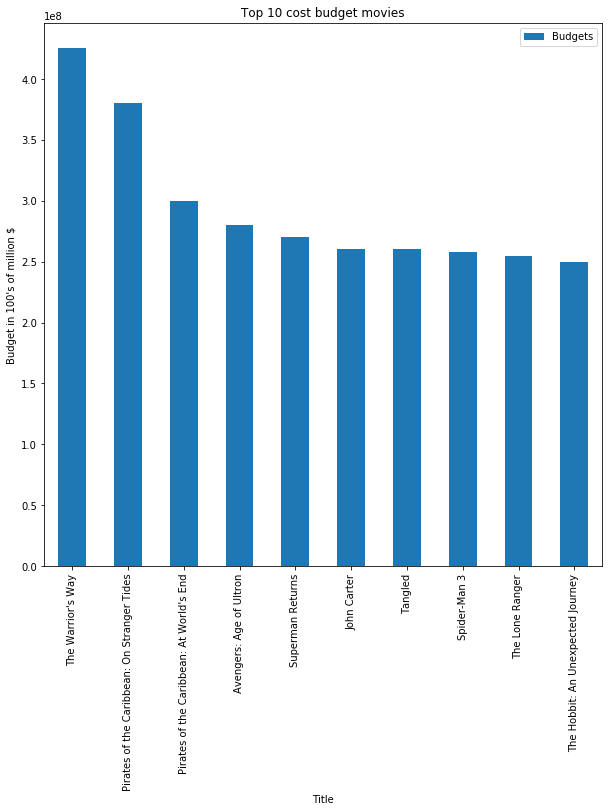

In [13]:

sorted_budget = df['budget'].sort_values(ascending=False)[:10]
h_budget=pd.DataFrame()

titles_exp=[]

budgets=[]

for i in sorted_budget.index:
    titles_exp.append(df.loc[i,'original_title'])
    budgets.append(sorted_budget.loc[i])
    
h_budget['Title']=titles_exp
h_budget['Budgets']=budgets
h_budget.set_index('Title',inplace=True)
h_budget.plot(kind ='bar',figsize=(10,10))
plt.ylabel('Budget in 100\'s of million $');
plt.title('Top 10 cost budget movies');


In [11]:
h_budget

,Budgets
Title,
The Warrior's Way,425000000
Pirates of the Caribbean: On Stranger Tides,380000000
Pirates of the Caribbean: At World's End,300000000
Avengers: Age of Ultron,280000000
Superman Returns,270000000
John Carter,260000000
Tangled,260000000
Spider-Man 3,258000000
The Lone Ranger,255000000


#### The most expensive movie (highest budget) are The Warrior's way

### Research Question 2 : What run times are associated with each genre?

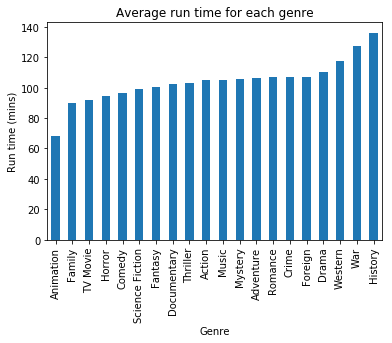

In [5]:
# Drop rows with null values in genre and director columns
df.dropna(subset=['genres'],inplace=True)


#Converting the 'genre' column into a list of genres by solitting at the pipe symbol
df['genres']= np.where((df['genres'].str.contains('\|')), df['genres'].str.split('|'), df['genres'])

#Making sure every row has data as a list, even if only one genre is present
df.loc[:, 'genres'] = df.genres.apply(np.atleast_1d)

# Horizontally stacking all the lists from all rows into one big list
all_genres = np.hstack(df.genres)

# n contains the runtime for that row while l contains the list of genres for that row 
#Repeating the runtime as many times as the length of list l and merging it all into one list
all_runtimes=[]
for n,l in df[['runtime','genres']].values:
    all_runtimes=all_runtimes+([n]*len(l))
    
# Assigning the merged lists / arrays to a new dataframe 
a = pd.DataFrame({'genre':all_genres, 'runtime':all_runtimes})

# Group by genre and find the average of runtimes sorted in ascending order
runtime_by_genre=a.sort_values(['runtime']).groupby('genre')['runtime'].mean()
runtime_by_genre.sort_values().plot(kind='bar');
plt.title('Average run time for each genre');
plt.ylabel('Run time (mins)');
plt.xlabel('Genre');


#### History is the genre with the longest movies while animation movies are the shortest.

### Research Question 3 : How have movie production trends varied over the years?

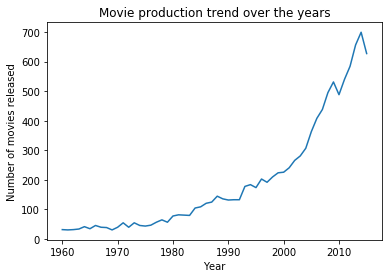

In [6]:
# Number of movies produced each year
movies_per_year= df['release_year'].value_counts().sort_index();
plt.plot(movies_per_year);
plt.title('Movie production trend over the years');
plt.xlabel('Year');
plt.ylabel('Number of movies released');

In [8]:
#Years with maximum and minimum movie production  
movies_per_year.idxmax() , movies_per_year.idxmin()

(2014, 1961)

#### Movie production has increased over the years from 1960 to 2015. The decade of 2000 - 2010 shows a steep increase in production compared to previous decades. The year 2014 with 700 movies, is the year of maximum movie production, and 1961 with 31 movies has been the year of least production

# <a id='conclusions'></a>
## Conclusions

The dataset was assessed and necessary cleaning steps were performed as documented above. Datatypes were made relevant to the context of the columns, , according to the reasoning providedreduced the data available for analysis The correlations explained do not imply causations. The inferences made are tentative and have scope for further refinement.
The analysis identifies the , top 10 cost budget movies. 
History is the genre with the longest movies while animation movies are the shortest .


## limitations:
  
    Dataset is not exhaustive and hence, results or inferences are not absolute. i.e The dataset does not confirm that every release of every director is listed. Findings are limited to datset only.
    We restrict ourselves to only numerical values of revenues. Any variances in currencies, like dollars, rupees, Euros, etc. are not considered.
    In case of varying currencies 
    which is likely since the movies range from different regions], exchange rates or conversions or some sort of normalization would need to be applied.
   
    While we did not have missing values for any of the factors under consideration, we acknowledge the presence of these limitations and assumptions in our analysis.


In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0